### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Initial clean up or dataset

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()

# Determine which values to replace if counts are less than 400  (from previous deliverable)
replace_application = list(application_counts[application_counts<400].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Determine which values to replace if counts are less than 1000 (from previous deliverable)
replace_class = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## Look at rest of variables in dataset

In [6]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [7]:
# check for null values
application_df.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [8]:
# look at unique values on each variable
for col in application_df.dtypes[application_df.dtypes=='object'].index.tolist():
    print(col)
    print('-----------------')
    print(application_df[col].value_counts())

APPLICATION_TYPE
-----------------
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
AFFILIATION
-----------------
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
CLASSIFICATION
-----------------
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
USE_CASE
-----------------
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
ORGANIZATION
-----------------
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
INCOME_AMT
-----------------
0                24388
25000-99999       3747
100000-499999     3

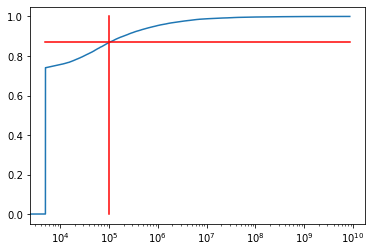

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(application_df.ASK_AMT)
plt.plot(ecdf.x,ecdf.y)
plt.plot([ecdf.x[1],ecdf.x[-1]],[.87,.87], c='red')
plt.plot([100000,100000],[0,1], c='red')
plt.xscale('log')
plt.show()

In [10]:
application_df.loc[application_df.ASK_AMT>100000, 'ASK_AMT'] = 100000

In [11]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [12]:
# Remove features that are heavily unbalanced.
application_df=application_df.drop(columns=['SPECIAL_CONSIDERATIONS','STATUS'])

In [13]:
# helper functions
import math
import os
import matplotlib.pyplot as plt

# Generate boxplots for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def boxplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].boxplot(df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].boxplot(df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

# Generate histograms with 20 bins for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def histograms(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].hist(df[col], alpha=0.5, bins=20)
            axs[j].set_title(col)
        else:
            axs[i][j].hist(df[col], alpha=0.5, bins=20)
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

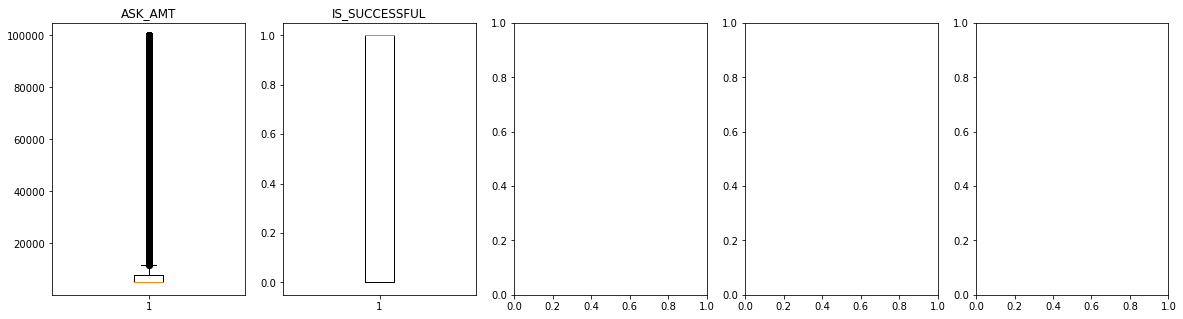

In [14]:
# Check numeric variables.
boxplots(application_df)

In [15]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes=='object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
application_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
print(X_train_scaled.shape)
X_train_scaled

(25724, 40)


array([[-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399],
       [-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399],
       [-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399],
       ...,
       [-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399],
       [-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399],
       [-0.50740491, -0.0887426 , -0.12519973, ..., -0.35067864,
        -0.06432508, -0.07290399]])

## Use Keras Auto Tuner

In [22]:
n_features=len(X.columns)
n_features

40

In [23]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=40,
        max_value=160,
        step=20), activation=activation, input_dim=n_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=40,
            max_value=160,
            step=20),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [24]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.RandomSearch(
    create_model,
    objective = 'accuracy',
    max_trials = 10,
    directory=os.path.normpath('C:/'))

In [25]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=60,validation_data=(X_test_scaled,y_test))

Trial 10 Complete [00h 00m 48s]
accuracy: 0.7328564524650574

Best accuracy So Far: 0.7419530153274536
Total elapsed time: 00h 11m 02s
INFO:tensorflow:Oracle triggered exit


In [26]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 140,
 'num_layers': 5,
 'units_0': 120,
 'units_1': 80,
 'units_2': 100,
 'units_3': 80,
 'units_4': 60,
 'units_5': 60}

In [27]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6239 - accuracy: 0.7262
Loss: 0.6238588690757751, Accuracy: 0.7261807322502136


In [30]:
tuner.results_summary()

Results summary
Results in C:\untitled_project
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
activation: relu
first_units: 140
num_layers: 5
units_0: 120
units_1: 80
units_2: 100
units_3: 80
units_4: 60
units_5: 60
Score: 0.7419530153274536
Trial summary
Hyperparameters:
activation: tanh
first_units: 60
num_layers: 1
units_0: 60
units_1: 60
units_2: 160
units_3: 60
units_4: 100
units_5: 100
Score: 0.7328564524650574
Trial summary
Hyperparameters:
activation: tanh
first_units: 140
num_layers: 3
units_0: 100
units_1: 140
units_2: 120
units_3: 80
units_4: 100
units_5: 60
Score: 0.7109314203262329
Trial summary
Hyperparameters:
activation: tanh
first_units: 80
num_layers: 4
units_0: 40
units_1: 140
units_2: 120
units_3: 60
units_4: 100
units_5: 100
Score: 0.7044394612312317
Trial summary
Hyperparameters:
activation: tanh
first_units: 120
num_layers: 5
units_0: 80
units_1: 160
units_2: 120
units_3: 60
units_4: 120
units_5: 80
Score: 0.6911

### Alternative manual modeling construction

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = len(X_train_scaled[0])
n_nodes_layer1 = 140 #n_features*3
n_nodes_layer2 = 120 #n_features*3
n_nodes_layer3 = 80 # n_features*3
n_nodes_layer4 = 60 #n_features*3
n_nodes_layer5 = 60 #n_features*3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=n_nodes_layer1, input_dim=n_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=n_nodes_layer2, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer4, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_nodes_layer5, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 140)               5740      
_________________________________________________________________
dense_20 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_21 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_22 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_23 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 61        
Total params: 40,921
Trainable params: 40,921
Non-trainable params: 0
__________________________________________________

In [41]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Import checkpoint dependencies
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define path and callback
os.makedirs("checkpoints_del3/", exist_ok=True)
checkpoint_path = "checkpoints_del3/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1,
                             save_weights_only=True,
                             save_freq='epoch', period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=120, callbacks=cp_callback)

Epoch 1/120
804/804 [==============================] - 1s 945us/step - loss: 0.5649 - accuracy: 0.7258
Epoch 2/120
804/804 [==============================] - 1s 933us/step - loss: 0.5522 - accuracy: 0.7323
Epoch 3/120
804/804 [==============================] - 1s 940us/step - loss: 0.5485 - accuracy: 0.7332
Epoch 4/120
804/804 [==============================] - 1s 939us/step - loss: 0.5465 - accuracy: 0.7346
Epoch 5/120
804/804 [==============================] - 1s 940us/step - loss: 0.5461 - accuracy: 0.7337

Epoch 00005: saving model to checkpoints_del3\weights.05.hdf5
Epoch 6/120
804/804 [==============================] - 1s 972us/step - loss: 0.5455 - accuracy: 0.7355
Epoch 7/120
804/804 [==============================] - 1s 970us/step - loss: 0.5439 - accuracy: 0.7360
Epoch 8/120
804/804 [==============================] - 1s 976us/step - loss: 0.5433 - accuracy: 0.7352
Epoch 9/120
804/804 [==============================] - 1s 989us/step - loss: 0.5427 - accuracy: 0.7359
Epoch 10/1

804/804 [==============================] - 1s 980us/step - loss: 0.5258 - accuracy: 0.7446
Epoch 72/120
804/804 [==============================] - 1s 976us/step - loss: 0.5257 - accuracy: 0.7442
Epoch 73/120
804/804 [==============================] - 1s 963us/step - loss: 0.5247 - accuracy: 0.7448
Epoch 74/120
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7442
Epoch 75/120
804/804 [==============================] - 1s 977us/step - loss: 0.5257 - accuracy: 0.7448

Epoch 00075: saving model to checkpoints_del3\weights.75.hdf5
Epoch 76/120
804/804 [==============================] - 1s 987us/step - loss: 0.5258 - accuracy: 0.7447
Epoch 77/120
804/804 [==============================] - 1s 970us/step - loss: 0.5246 - accuracy: 0.7448
Epoch 78/120
804/804 [==============================] - 1s 971us/step - loss: 0.5245 - accuracy: 0.7448
Epoch 79/120
804/804 [==============================] - 1s 1ms/step - loss: 0.5244 - accuracy: 0.7451
Epoch 80/120
804/8

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6038 - accuracy: 0.7247
Loss: 0.6038442254066467, Accuracy: 0.7246647477149963


In [44]:
# Save model to hdf5 file
nn.save("AlphabetSoupCharity_Optimized.h5")